In [1]:
import re
from mongoengine import connect, disconnect
from pycoshark.mongomodels import Project, VCSSystem, Commit, FileAction, Hunk, Refactoring, IssueSystem, Issue, IssueComment, MailingList, Message,PullRequestSystem
from pycoshark.utils import create_mongodb_uri_string


# You may have to update this dict to match your DB credentials
disconnect()
credentials = {'db_user': '',
               'db_password': '',
               'db_hostname': 'localhost',
               'db_port': 27017,
               'db_authentication_database': '',
               'db_ssl_enabled': False}

uri = create_mongodb_uri_string(**credentials)

connect('smartshark_2_1', host=uri, alias='default')

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, read_preference=Primary())

In [2]:
commit_id = []
project = Project.objects(name='falcon').get()

for fa in FileAction.objects.all():
    if fa.induces != [] :
        for i in fa.induces:
            if i['szz_type'] == 'inducing':
                commit = Commit.objects(id=fa.commit_id).get()
                vcs_system = VCSSystem.objects(id=commit.vcs_system_id, project_id=project.id)
                if vcs_system and commit.id not in commit_id:
                    commit_id.append(commit.id)
                    print(commit.id)

5b432988c335c758c49dbf79
5b432989c335c758c59dbf79
5b432989c335c758c99dbf79
5b43298bc335c758ba9dbfb3
5b43298bc335c758bc9dbf8f
5b43298ac335c758bd9dbf83
5b43298bc335c758be9dbf8e
5b43298bc335c758c49dbf8d
5b43298bc335c758bf9dbf8b
5b43298ac335c758c09dbf84
5b43298bc335c758c39dbf85
5b43298bc335c758c59dbf8d
5b43298ac335c758c89dbf82
5b43298cc335c758bb9dbfa6
5b43298dc335c758c19dbf9a
5b43298dc335c758c59dbfad
5b43298ec335c758c79dbfa2
5b43298dc335c758c39dbf9c
5b43298dc335c758c49dbfab
5b432991c335c758c79dbfb9
5b43298ec335c758bd9dbfb6
5b432995c335c758c79dc011
5b432998c335c758bf9dc033
5b432999c335c758c49dc021
5b432999c335c758c59dc058
5b432998c335c758bc9dbff9
5b432998c335c758c39dbff4
5b432998c335c758bd9dc02a
5b43299ac335c758c99dc00a
5b43299cc335c758c29dc074
5b43299dc335c758c49dc097
5b43299fc335c758c29dc092
5b43299dc335c758c39dc035
5b43299ec335c758c89dc071
5b43299fc335c758c99dc04e
5b4329a0c335c758c49dc0c7
5b4329a0c335c758c69dc08b
5b43299fc335c758c09dc102
5b4329a0c335c758c39dc05b
5b432993c335c758ba9dc006


5b432a84c335c758bc9dcef9
5b432a84c335c758bf9dcffd
5b432a84c335c758c29dd041
5b432a86c335c758bd9dd01c
5b432a86c335c758c49dd190
5b432a87c335c758bc9dcf2a
5b432a86c335c758bf9dd01d
5b432a86c335c758c89dcdca
5b432a88c335c758ba9dd20d
5b432a86c335c758c29dd06f
5b432a87c335c758c49dd1c4
5b432a87c335c758c79dcd69
5b432a87c335c758c89dcde4
5b432a88c335c758c99dcf33
5b432a88c335c758ba9dd224
5b432a88c335c758c39dcf9a
5b432a89c335c758be9dcfb9
5b432a89c335c758c09dcfd7
5b432a89c335c758c29dd0fd
5b432a8bc335c758c29dd126
5b432a8bc335c758c59dcd78
5b432a8bc335c758c79dcdd4
5b432a8bc335c758ba9dd29e
5b432a8cc335c758be9dcff1
5b432a8bc335c758bf9dd0c3
5b432a8cc335c758c29dd12c
5b432a8bc335c758c39dcffa
5b432a8dc335c758bb9dd363
5b432a8cc335c758c09dd013
5b432a8bc335c758c59dcd87
5b432a8fc335c758c79dcec5
5b432a91c335c758ba9dd3df
5b432a91c335c758c49dd2d9
5b432a91c335c758c79dcf2f
5b432a8fc335c758c89dce80
5b432a92c335c758ba9dd3f7
5b432a92c335c758be9dd078
5b432a92c335c758c39dd0fa
5b432a91c335c758c59dce3d
5b432a92c335c758c89dcefa


5b432b14c335c758c39dd9e7
5b432b13c335c758c89dd923
5b432b13c335c758c99dd921
5b432b14c335c758ba9de0d3
5b432b14c335c758c39dd9f2
5b432b15c335c758c49ddc6f
5b432b15c335c758c99dd948
5b432b15c335c758c19ddb95
5b432b14c335c758c79dd7e0
5b432b18c335c758bb9ddd39
5b432b17c335c758c79dd813
5b432b18c335c758c89dd98c
5b432b19c335c758bb9ddd42
5b432b19c335c758bf9dd9e9
5b432b1cc335c758ba9de16a
5b432b1bc335c758c39dda3c
5b432b1cc335c758c89dd9b7
5b432b1dc335c758bc9ddaff
5b432b1dc335c758c39dda4e
5b432b1cc335c758c79dd843
5b432b1dc335c758bf9dda24
5b432b1cc335c758c49ddce4
5b432b1dc335c758c89dd9cc
5b432b1ec335c758bf9dda31
5b432b1ec335c758c39dda68
5b432b1ec335c758ba9de183
5b432b24c335c758bc9ddb21
5b432b23c335c758c79dd87c
5b432b24c335c758bb9dde0d
5b432b24c335c758c39dda7a
5b432b26c335c758bf9dda8b
5b432b26c335c758c59dd8fb
5b432b29c335c758ba9de1bb
5b432b29c335c758c79dd8a1
5b432b26c335c758c39dda8b
5b432b2bc335c758c79dd8b5
5b432b2bc335c758bc9ddb5c
5b432b2ec335c758bf9ddabd
5b432b30c335c758bf9ddace
5b432b31c335c758ba9de1e5


KeyboardInterrupt: 

In [3]:
from pycoshark.mongomodels import PullRequest, PullRequestCommit

my_dict = []

print("Number of total bug inducing commits in falcon: " + str(len(commit_id)))
pull_request_system = PullRequestSystem.objects(project_id=project.id).get()
pr = PullRequest.objects(pull_request_system_id=pull_request_system.id)
print("Number of pull-request in the project: " + str(pr.count()))

for item in pr:
    pr_commit = PullRequestCommit.objects(pull_request_id=item.id)
    for value in pr_commit:
        if value.commit_id in commit_id:
            
            for key in my_dict:
                if key["pull_request"] == item.id:
                    key["commit_count"] += 1
            else:
                dict = {"pull_request":item.id,
                       "commit_count": 1,
                       "time_difference": item.updated_at - item.created_at}
                my_dict.append(dict)
                                             

print(len(my_dict))

Number of total bug inducing commits in falcon: 785
Number of pull-request in the project: 417
20


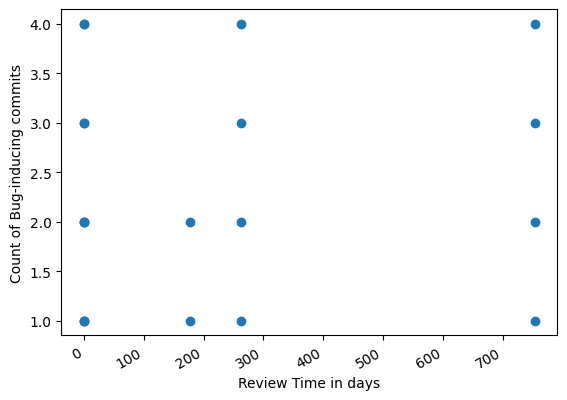

In [4]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np

x = []
y = []
for item in my_dict:
    x.append(item["time_difference"].days)
    y.append(item["commit_count"])

plt.scatter(x,y)    
plt.gcf().autofmt_xdate()
plt.xlabel("Review Time in days")
plt.ylabel("Count of Bug-inducing commits")
plt.show()

In [10]:
vcs_system = VCSSystem.objects(project_id=project.id).get()


print('VCS System:', vcs_system.url)

# We can now fetch the commits and analyze them
num_commits = Commit.objects(vcs_system_id=vcs_system.id).count()

print('Number of commits:', num_commits)

count_bugfix = 0
count_linked_issue = 0
count_hunks = 0
count_refactorings_refdiff = 0
count_refactorings_refactoringminer = 0

# Only limits the fields we are reading to the required fields. This is important for the performance.
for commit in Commit.objects(vcs_system_id=vcs_system.id).only('labels', 'linked_issue_ids'):
    if commit.labels is not None and 'validated_bugfix' in commit.labels and commit.labels['validated_bugfix']==True:
        count_bugfix += 1
    if commit.linked_issue_ids is not None and len(commit.linked_issue_ids)>0:
        count_linked_issue += 1
        
    # File actions group all changed hunks in a commit of the same file
    for fa in FileAction.objects(commit_id=commit.id):
        count_hunks += Hunk.objects(file_action_id=fa.id).count()
        
    count_refactorings_refdiff += Refactoring.objects(commit_id=commit.id, detection_tool='"refDiff"').count()
    count_refactorings_refactoringminer += Refactoring.objects(commit_id=commit.id, detection_tool='rMiner').count()

        
print('Number of bug fixing commits:', count_bugfix)
print('Number of commits that link to a Jira issue:', count_linked_issue)
print('Number of hunks for all commits:', count_hunks)
print('Number of refactorings detected by refDiff:', count_refactorings_refdiff)
print('Number of refactorings detected by RefactoringMiner:', count_refactorings_refactoringminer)

VCS System: https://github.com/apache/falcon.git
Number of commits: 2550
Number of bug fixing commits: 316
Number of commits that link to a Jira issue: 1644
Number of hunks for all commits: 81349
Number of refactorings detected by refDiff: 0
Number of refactorings detected by RefactoringMiner: 4766


In [5]:
import pandas as pd   
df = pd.DataFrame(my_dict)
df.to_csv('falcon.csv', index=False)